In [121]:
using LinearAlgebra, Statistics
using DataFrames, RDatasets, DataFramesMeta, CategoricalArrays, Query
using GLM
using Plots

In [195]:
function CovMatrix(dataframe)
    n_features = ncol(dataframe)
    
    X = convert(Matrix, dataframe)
    
    for i = 1:n_features
        X[:,i] = X[:,i] .- mean(X[:,i])
    end
    
    covariance_matrix = X'*X
    return covariance_matrix
end

CovMatrix (generic function with 1 method)

In [196]:
function PCA(dataframe, n_components)
    Cov = CovMatrix(dataframe)
    M = convert(Matrix, dataframe)
    
    if ncol(dataframe) < n_components
        return error("Number of Components can't be more than number of Features!")
    end
    
    F = svd(Cov)
    U = F.U
    Σ = F.S
    
    total = sum(Σ)
    covered = sum(Σ[1:n_components])
    
    covered_variance = covered/total
    
    components = M * U[:,1:n_components]
    
    df = DataFrame(components,["PC_$i" for i = 1:n_components])
    
    print("Covered Variance: $covered_variance")
    
    return df, U[:,1:n_components], Σ
end

PCA (generic function with 1 method)

In [236]:
iris = dataset("datasets", "iris");
PC, V, Σ = PCA(iris[:,3:4],2);

Covered Variance: 1.0

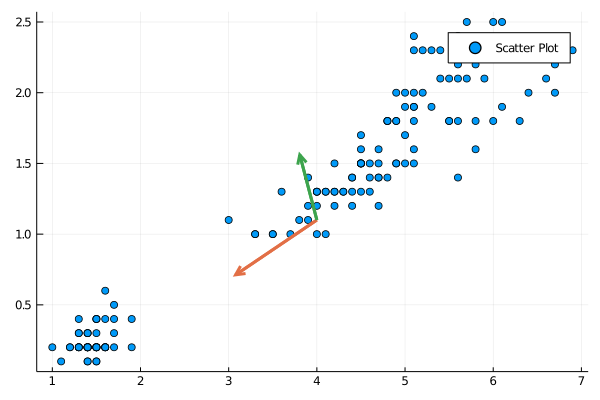

In [242]:
gr()
plot(iris.PetalLength, iris.PetalWidth, seriestype = :scatter, label="Scatter Plot")
quiver!([4],[1.1], quiver = ([V[1,1]],[V[2,1]]), w=3, label="1st Component")
quiver!([4],[1.1], quiver = ([0.5*V[1,2]],[0.5*V[2,2]]),w=3, label="2nd Component")